# Predicting Educational Disadvantage from Czech School Inspectorate Reports: A Textual Data Analysis Approach

In [32]:
# Display the saved plots (as plot do not show when separate code is called from the notebook
from IPython.display import Image, display

import os


## 1. Introduction
### 2.1. Research Question:
Can textual data from Czech School Inspectorate (ČŠI) reports be used to predict educational disadvantage or failure in schools?

### 2.2. Motivation:

1. Education policy impact <br>
Education in Czechia suffers from a big differences in educational quality in primary education. Simply put, not all shools perform the same and student's educational outcome depends quite heavily on their place of birth. Differences in education exist between regions and also between schools within a region. Identifying schools at risk can help inform necessary interventions and allocation of resources. <br>
SOURCES: **XXXX**<br>
<br>
2. Use of text data in education <br>
Traditionally, educational outcomes are analyzed using quantitative data like test scores or graduation rates. Textual data are not yet used for country-wide predictions of disadvantaged schools. They are frankly not used much for any country-wide evaluation. Textual data is also unstructured and rich in information. Analyzing this data could reveal patterns and indicators of disadvantage that are overlooked in structured data.

## 3. Methods
The analysis employs a combination of text understanding and processing methods in combination with advanced machine learning techniques (Lasso regression and mainly a deep neural network model). The main model is trained on a dataset of school disadvantage probabilities.

### 3.1 Data sources
1. ***Inspection reports*** from Czech School Inspectorate (pdf files from an inspectorate website)<br>
Basic school metadata and detailed evaluations of school performance, including descriptions of teaching quality, school management, student outcomes, and other relevant factors.
2. ***School disadvantage data***<br>
Currently not publicly available. The data were calculated and shared from a former employee of the Czech Ministry of Education Jiri Munich.

### 3.2 Text processing
The textual data go though a several preprocessing steps to transform the raw text into a structured and analyzable format.

1. **Tokenization and Lemmatization**
   - The raw text of the reports is broken down into individual tokens, mostly single words. Tokenization helps in handling the text at a granular level, making it easier to perform subsequent text processing tasks. Lemmatization is applied to reduce words to their base or root forms. For example, "running" becomes "run". This step is crucial for handling the complexities of the Czech language, where words can have multiple inflected forms.
   - **Tool Used**: The task is performed with the `Morphodita` library. A library developed for processing Czech language data.
2. **Stop Words and Noise Removal**:
   - Common stop words (e.g., "and", "the") and non-informative tokens are removed to focus on the most meaningful content.
3. **TF-IDF (Term Frequency-Inverse Document Frequency)**:
   - TF-IDF is used to convert the cleaned text data into numerical features. It reflects how important a word is to a document in the corpus.
   - The `TfidfVectorizer` from `scikit-learn` is used to calculate the TF-IDF values for the tokens in each report.
4**Principal Component Analysis (PCA)**:
   - PCA is applied to the TF-IDF features to reduce the dimensionality of the data while preserving as much variance as possible. The resulting principal components are used as input features for further analysis, reducing computational complexity and enhancing model performance.
   - The `PCA` module from `scikit-learn` is used to transform the high-dimensional TF-IDF matrix into a smaller set of uncorrelated features (principal components).

### 3.3 Analysis methods

#### Correlation Analysis
- **Initial Exploration**: A correlation analysis is performed to understand the relationships between the principal components (PCs) derived from the text data and the target variable, which represents educational disadvantage.

#### Lasso Regression
- **Initial Modeling**: Before implementing the neural network, a Lasso regression is applied to the dataset for future comparison and better understanding of the role of the components.

#### Neural Network Model
- **Architecture**: The core of the analysis relies on a neural network with three hidden layers, chosen from a collection of other settings by eyeballing the outcomes and by other evaluation metrics. This architecture allows the model to learn intricate, non-linear relationships in the data. The use of multiple layers is crucial for capturing the hierarchical nature of the data, where lower layers learn basic patterns, and higher layers build on these to recognize more complex structures.
- **Sigmoid Output**: A sigmoid activation function is chosen for the output layer to ensure that the predictions are bounded between 0 and 1, aligning with the nature of the target variable (a measure of disadvantage).

#### Model Evaluation
- **Predictive Power**: The effectiveness of the model is assessed by its ability to accurately predict the target variable on the test set. This involves comparing the predicted values against the actual values to determine how well the model generalizes to unseen data.
- **Mean Squared Error (MSE)**: The model's performance is evaluated using Mean Squared Error, which measures the average squared difference between the predicted and actual values. A lower MSE indicates better predictive accuracy and fewer large errors.
- **R-squared (R²)**: R-squared is another metric used to evaluate the model, representing the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value indicates that the model explains a significant portion of the variability in the outcome variable.


### Causality Considerations
- **Correlation vs. Causation**: While the neural network model identifies patterns and makes predictions, it is fundamentally based on correlations in the data. This means that while the model can suggest which factors are associated with educational disadvantage, it cannot establish causal relationships. For instance, if a certain word or phrase frequently appears in reports for disadvantaged schools, the model might predict disadvantage based on this feature, but this does not imply that the word or phrase causes the disadvantage.
- **Assumptions**: The analysis assumes that the patterns in the textual data are consistent and that the principal components effectively capture the most relevant information. Additionally, the neural network's predictive power relies on the assumption that the training data is representative of the broader population of school reports.

In summary, the methods used in this analysis are ***primarily correlational***. The neural network model is a powerful tool for prediction, but offers in this state of the project ***no causal interpretations***.

## 4. Results

### Neural network
- ***MSE***: When faced with smaller dataset of schools which have a) relatively high confidence of either advantage or disadvantage and b) available inspection reports to match, the final MSE is **0.02375**, this suggests that the model is generally accurate in its predictions. Initially, there is a sharp decline in the MSE, indicating that the model quickly learns from the data. However, after around 20 epochs, the validation loss stabilizes, suggesting that further training does not significantly improve the model's performance. The divergence between the training and validation losses suggests a later seen smaller effectively on unseen data.

![Learning Curves](plots/Learning Curves.png)

- ***True vs Predicted Values***: The scatter plot shows that the model is reasonably good at predicting school with low chance of being disadvantaged (<0.5), but does not really predict well schools with high known probability of disadvantage.

![True vs Predicted Values](plots/True vs Predicted Values.png)

- ***Residual Analysis***: The histogram of residuals shows a roughly normal distribution centered around zero. This is a good sign, as it suggests that the model's errors are randomly distributed rather than systematically biased. However, the presence of outliers and the spread of residuals suggest that there are instances where the model's predictions are significantly off.

![Histogram of Residuals](plots/Histogram of Residuals.png)

## 5. Step by step explanation of the code
As the code is quite extensive, the individual sections are in their own individual scripts, which can be started from here. Detailed explanation of the code is in each individual script.

### 5.1 Downloading the inspectorate reports
The following code uses a csv called 'inspekcni_zpravy.csv', downloaded from the czech inspectorate. This dataset has basic school metadata and website links to inspection reports.
AS the dataset is quite large, the code is currently limited to report_limit = 100, after which it stops downloading. If you want to download all reports, increase the limit. The total data entries is more than 14 000. 

In [33]:
#set where your scripts are located
os.chdir('C:/++4630/++ University, education/03 -- Tilburg_v02/Data Science/scripts')

!python download_inspection.py

Text file already exists for REDIZO 600117782. Skipping download and extraction.
Text file already exists for REDIZO 665101872. Skipping download and extraction.
Text file already exists for REDIZO 691002029. Skipping download and extraction.
Text file already exists for REDIZO 600126625. Skipping download and extraction.
Text file already exists for REDIZO 600099121. Skipping download and extraction.
Text file already exists for REDIZO 600036499. Skipping download and extraction.
Text file already exists for REDIZO 691000336. Skipping download and extraction.
Text file already exists for REDIZO 600025900. Skipping download and extraction.
Text file already exists for REDIZO 691004153. Skipping download and extraction.
Text file already exists for REDIZO 600148858. Skipping download and extraction.
Text file already exists for REDIZO 600098800. Skipping download and extraction.
Text file already exists for REDIZO 600079597. Skipping download and extraction.
Text file already exists for

### 5.2 Preprocessing the text
The following code processes text reports from a directory of inspection reports. It uses the Morphodita library for lemmatization and part-of-speech (POS) tagging. 

1. **Report Processing Limit**: The script is set to process up to `20,000` reports, but this can be adjusted with the `report_limit` variable.

2. **Directory Paths**: 
   - The original text files are located in the `../data/csi_reports/` directory.
   - Processed text files are saved in the `../data/processed/` directory, which is created if it doesn't already exist.

3. **Morphodita Initialization**: 
   - The Morphodita model is loaded from `../models/czech-morfflex2.0-pdtc1.0-220710/czech-morfflex2.0-pdtc1.0-220710-no_dia.tagger`.
   - The tokenizer is initialized to break down the text for processing.
  - [Visit the Morphodita website for detailed information on the package](https://ufal.mff.cuni.cz/morphodita)


4. **Text Preprocessing**: 
   - For each text file in the directory:
     - If the file has already been processed, it is skipped.
     - The text is read and tokenized.
     - Lemmatization and POS tagging are performed, retaining only nouns, adjectives, and verbs.
     - The processed text is saved with the same filename in the `processed` directory.

In [35]:
!python preprocess_texts.py

File 600000206_2021_MateĹ™skĂˇ Ĺˇkola sv. VorĹˇily v Praze_inspection_report.txt already processed. Skipping...
File 600000222_2017_CĂ­rkevnĂ­ mateĹ™skĂˇ Ĺˇkola StudĂˇnka_inspection_report.txt already processed. Skipping...
File 600000222_2024_CĂ­rkevnĂ­ mateĹ™skĂˇ Ĺˇkola StudĂˇnka_inspection_report.txt already processed. Skipping...
File 600000231_2018_ModrĂ˝ klĂ­ÄŤ - zĂˇkladnĂ­ Ĺˇkola speciĂˇlnĂ­ a mateĹ™skĂˇ Ĺˇkola speciĂˇlnĂ­, o.p.s._inspection_report.txt already processed. Skipping...
File 600000249_2019_CĂ­rkevnĂ­ mateĹ™skĂˇ Ĺˇkola SrdĂ­ÄŤko_inspection_report.txt already processed. Skipping...
File 600000257_2016_BilingvĂˇlnĂ­ mateĹ™skĂˇ Ĺˇkola pro sluchovÄ› postiĹľenĂ© s.r.o._inspection_report.txt already processed. Skipping...
File 600000257_2023_BilingvĂˇlnĂ­ mateĹ™skĂˇ Ĺˇkola pro sluchovÄ› postiĹľenĂ© s.r.o._inspection_report.txt already processed. Skipping...
File 600000265_2017_SOUKROMĂ� MATEĹ�SKĂ� Ĺ KOLA OPUS, O.P.S._inspection_report.txt already processed. Skipping...
Fil

### 5.3 Transform and reduce
The following code is designed to process textual data by transforming it into numerical features and reducing its dimensionality for further analysis.

- **File Processing**: The script starts by setting up paths to directories where the processed text files and results will be stored. It reads in the processed text files and limits the number of files to process based on a predefined chunk size and optional processing limit.

- **TF-IDF Vectorization**: The code uses the `TfidfVectorizer` from the `sklearn` library to transform the processed text documents into a TF-IDF matrix. This matrix represents the importance of words within the documents. The vocabulary is established by fitting the vectorizer on a subset or the entirety of the text data.

- **Chunk Processing**: The script processes the text files in chunks to manage memory usage efficiently. Each chunk of documents is transformed into a TF-IDF matrix, which is then saved as a sparse matrix. Metadata (such as school identifiers and report years) is also saved for each chunk.

- **Dimensionality Reduction using PCA**: The TF-IDF matrices from all chunks are loaded and concatenated into a single matrix. The `PCA` (Principal Component Analysis) from the `sklearn` library is then applied to reduce the dimensionality of the data, retaining only the most significant components. This step is crucial for making the data more manageable and enhancing the performance of machine learning models.

- **Saving Results**: The reduced features, along with metadata, are saved to a CSV file. The script also visualizes the explained variance by each principal component through scree plots and cumulative explained variance plots. Additionally, a 2D scatter plot and a pairplot of the first few principal components are generated to visualize the data's structure in the reduced feature space.

- **Visualization**: Finally, the script includes visualizations to assess how much variance each principal component explains and to explore relationships between the first few principal components.


!!! The uploaded files do not include the original data (for size reasons), only transformed and reduced output of the following code. So do not run this part of the code if you don't want to replace the full data with transformation and reduction done only from the newly downloaded files. !!!

In [ ]:
# !python transform_reduce.py
# 
# os.chdir('C:/++4630/++ University, education/03 -- Tilburg_v02/Data Science/plots')
# 
# display(Image(filename='Cumulative Explained Variance.png'))
# 
# 
# os.chdir('C:/++4630/++ University, education/03 -- Tilburg_v02/Data Science/plots')


### 5.4 First analysis and naive regression
The following code is used to load, filter, and analyze data related to Czech school inspections. It performs several key tasks, including merging datasets, calculating correlations and then applying a Lasso regression model.

### Data Loading and Preprocessing

- **Loading Data**: The code begins by loading a CSV file containing school inspection data. It then renames a column to ensure consistency with the processed features dataset.

- **Filtering Data**: The code filters out special schools and neighboring school data to focus only on the relevant institutions. It converts the school identifier ('redizo') to a string for consistency.

- **Merging Datasets**: The code loads processed PCA features and merges them with the filtered data. It calculates the distance in years to match the closest inspection report for each school and adds this information to the dataset.

- **Handling Missing Data**: The code drops rows with missing values to ensure data completeness before saving the complete and filtered datasets to CSV files.

### Data Analysis

- **Correlation Analysis**: The code selects numeric columns from the filtered dataset and calculates the correlation between the principal components (PCs) and the target variable ('value'). It then visualizes these correlations using bar plots for different groups of PCs.

- **Lasso Regression**: The code defines the PCs as features and the 'value' as the target variable. It splits the data into training and testing sets and applies a Lasso regression model with cross-validation to find the optimal regularization parameter (alpha). The model's performance is evaluated using Mean Squared Error (MSE) and R-squared (R²) metrics.

- **Visualization**: The code generates several plots, including:
  - A scatter plot of true vs. predicted values to assess the model's performance.
  - A plot of Lasso coefficients to visualize the importance of each feature in the model.

### Explanation of Variables and Their Significance
Following inforamtion is from the data source:<br>

The variable `value` represents the probability that an expert would classify a particular school as disadvantaged. This probability is derived from a Bayesian model that estimates how likely it is that an expert, with local knowledge, would perceive the school as facing disadvantages.

#### Understanding the Variables `bound` and `nschool`

- **`nschool`**: This variable indicates whether the value pertains to the specific school identified by `redizo` or one of the ten geographically nearest schools (measured as the crow flies) related to this school. A value of `0` indicates that the data is for the school itself, while other values correspond to nearby schools ranked by physical proximity. If you are only interested in the specific school, you can filter the data with `nschool == 0`.

- **`bound`**: This variable indicates whether the reported value represents the upper or lower bound of the Bayesian 95% credible interval. This interval provides a range in which the true probability is likely to fall, given the uncertainty in the estimation process.

  - The **lower bound** (`bound == 'lower'`) corresponds to the 2.5% quantile of the posterior distribution, indicating the lower end of the credible interval.
  - The **upper bound** (`bound == 'upper'`) corresponds to the 97.5% quantile, indicating the upper end.

The credible interval reflects the uncertainty surrounding the expert’s decision-making process, influenced by factors such as the school's size and the number of observations available. For practical purposes, a school is considered disadvantaged if the upper bound exceeds 0.83, based on empirical analysis which balanced sensitivity and specificity effectively with this threshold.


In [ ]:
!python analyse.py

#currently other plots are muted to not overwhelm this notebook
os.chdir('C:/++4630/++ University, education/03 -- Tilburg_v02/Data Science/plots')
display(Image(filename='plots/True vs Predicted Values (Lasso Regression).png'))
os.chdir('C:/++4630/++ University, education/03 -- Tilburg_v02/Data Science/scripts')

In [16]:
!python scripts\neural_network.py

Epoch 1/300

 1/29 â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 1:03 2s/step - loss: 0.0817
27/29 â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 0s 2ms/step - loss: 0.0485 
29/29 â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 3s 9ms/step - loss: 0.0477 - val_loss: 0.0313
Epoch 2/300

 1/29 â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 0s 23ms/step - loss: 0.0254
29/29 â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 0s 2ms/step - loss: 0.0207 - val_loss: 0.0266
Epoch 3/300

 1/29 â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 0s 24ms/step - loss: 0.0081
29/29 â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 0s 3ms/step - loss: 0.0099 - val_loss: 0.0264
Epoch 4/300

 1/29 â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 0s 25ms/step - loss: 0.0077
29/29 â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”�â”� 0s 2ms/step - loss: 0.0071 - val_loss: 0.0269
Epoch 5/300

 1/29 â”

2024-08-16 19:27:20.385220: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-16 19:27:21.931480: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
C:\ProgramData\miniconda3\envs\Data_Science_3_11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-08-16 19:27:27.047704: I tensorflow/core/platform

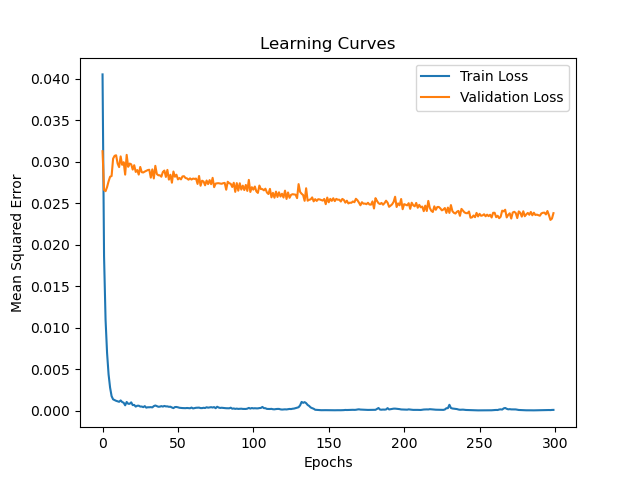

In [21]:
display(Image(filename='plots/Learning Curves.png'))






## 5. Exploratory Data Analysis (EDA)
### 5.1. Initial Data Exploration:

Visualize the distribution of text features (e.g., word frequencies).
Analyze correlations between text features and target outcomes (disadvantage, segregation, failure).
### 5.2. Data Visualization:

Use graphs and charts to introduce the data. Visualize the distribution of key terms, document length, and any initial findings.

## 6. Methodology
### 6.1. Machine Learning Models:

Start with simpler models (e.g., Logistic Regression) to predict the outcomes.
Experiment with more complex models like Random Forests, Support Vector Machines, or Neural Networks.
Consider using Ridge or Lasso regressions to handle high-dimensional text data.
### 6.2. Model Evaluation:

Use cross-validation to assess model performance.
Evaluate models using metrics like accuracy, precision, recall, and F1 score.
6.3. Causality Considerations:

Discuss whether your models allow for causal inference or if they are purely correlational. Address any assumptions necessary for causal claims.

## 7. Results
### 7.1. Model Performance:

Report the performance of different models. Include tables and graphs to compare results.
Discuss how well your model fits the data and the significance of key predictors.
### 7.2. Key Findings:

Provide a clear summary of your findings. For example, identify which terms or phrases are most predictive of educational disadvantage.

## 8. Conclusion
### 8.1. Answer to Research Question:

Provide a clear answer to your research question based on the analysis.
Summarize the implications of your findings for educational policy or practice.
### 8.2. Discussion:

Discuss the limitations of your study, such as potential biases in the text data or limitations of the models used.
Suggest areas for future research or improvements to the current analysis.
## 9. Code Explanation and Documentation
### 9.1. Code Comments and Documentation:

Ensure that all code is well-commented and explained. Provide a detailed explanation of complex sections to ensure reproducibility.
Include a README file in your repository to guide users on how to run the code and understand the analysis.
### 9.2. References:

Cite any external code or libraries you use. If you borrow code from online sources, provide proper attribution.